### 1. Define $A$ to be the event that draw number 3 from a fair deck of cards with out replacement is an Ace. Note that the first 2 draws can be anything.

##### a) Calculate the true probability of event A.  

There are several ways to get event $A$. We need to take them into account because draws one and two effect draw three. For example, if we got aces for one and two, draw three has a lower chance of coming up as an ace.

Lets list out the options. Let a represent an ace and !a represent not an ace. Since there are two ways each of three cards can come out, there would be $2^3$ combinations. But event $A$ says card three is an ace so there are two free cards, or $2^2$ ways. 

|Hand|Card 1|Card 2|Card 3|
|-|-|-|-|
|1|a|a|a|
|2|a|!a|a|
|3|!a|a|a|
|4|!a|!a|a|

Hand 1 is an ace AND ace AND ace $\rightarrow$ P(Hand 1) = $\frac{4}{52}\frac{3}{51}\frac{2}{50}$

Hand 2 is an ace AND !ace AND ace $\rightarrow$ P(Hand 2) = $\frac{4}{52}\frac{48}{51}\frac{3}{50}$

Hand 3 is an !ace AND ace AND ace $\rightarrow$ P(Hand 3) = $\frac{48}{52}\frac{4}{51}\frac{3}{50}$

Hand 4 is an ace AND !ace AND ace $\rightarrow$ P(Hand 2) = $\frac{48}{52}\frac{47}{51}\frac{4}{50}$

Event $A$ happens from hand 1 OR 2 OR 3 OR 4 $\rightarrow$ $\frac{4}{52}\frac{3}{51}\frac{2}{50} + \frac{4}{52}\frac{48}{51}\frac{3}{50} + \frac{48}{52}\frac{4}{51}\frac{3}{50} + \frac{48}{52}\frac{47}{51}\frac{4}{50} $


In [11]:
from fractions import Fraction as frac 
from scipy.stats import  binom
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frac(4,52) * frac(3,51)* frac(2,50) + frac(4,52)*frac(48,51)*frac(3,50) + frac(48,52)*frac(4,51)*frac(3,50) + frac(48,52)*frac(47,51)*frac(4,50) 

Fraction(1, 13)

In [3]:
print("probability of event A =", 1/13)

probability of event A = 0.07692307692307693


#### b) Estimate the probability of event A.
    
This is quite a bit easier! the np.random.choice function does the hard work for us by simply not replacing the card.

First we build the deck

In [4]:
suit = "HSCD"
ranks = "A23456789TJQK"
deck = [r + s for r in ranks for s in suit]

Next we make a loop that draws three cards without replacement, checks if the last card is an ace, increments a counter if it is, and estimates the probability by dividing count by the number of hands drawn. 

In [5]:
N = 1001
count = 0

for i in range(N):
    hand = np.random.choice(deck, 3, replace = False)
    if hand[2][0] == 'A':
        count += 1
prob = count/N
print("Estimate of probability of event A =", prob )

Estimate of probability of event A = 0.07662923370766292


### 2.  Generate N=1001 Binomial(K=12,p=0.65) random variables using the function 𝚗𝚙.𝚛𝚊𝚗𝚍𝚘𝚖.𝚋𝚒𝚗𝚘𝚖𝚒𝚊𝚕(). Name the returned array 𝚇. Round all numeric answers to 2 decimal places.


[ 7  9  5 ... 10  8  8]


Text(0, 0.5, 'frequency')

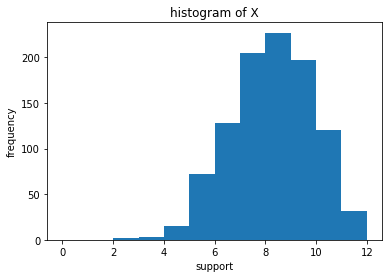

In [77]:
K = 12
p = .65
N = 1001 
X = np.random.binomial(K, p, size = N )
print(X)

#plot histogram of X
plt.hist(X, bins = np.arange(0,13))
plt.title('histogram of X')
plt.xlabel('support')
plt.ylabel('frequency')

#### a) Calculate the population mean.

#### b) Estimate the population mean using 𝚇.

In [78]:
np.mean(X)

7.7732267732267735

#### c) Calculate $f(x)$ for all values of $x$ in the support.

There are different number of ways to get each value in the support. For example, you can only get 0 or 12 one way each (12 0's or 12 1's). Because of this we would expect 0 and 12 to show up the least if $p$ were to be $.5$. 

#### d) Estimate $f(x)$ for all values of $x$ in the support.

Text(0, 0.5, '$f(x)$')

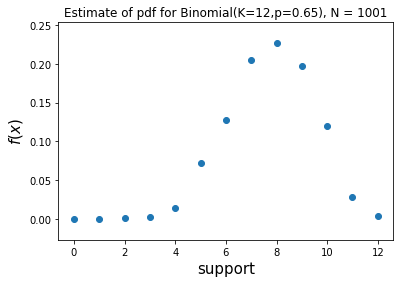

In [79]:
freq = np.zeros(K+1)
for i in range(K+1):
    freq[i] = np.sum(X == i)
fx = freq / N

plt.scatter(np.arange(K + 1), fx)
plt.title('Estimate of pdf for Binomial(K=12,p=0.65), N = %i' % N , fontsize = 12)
plt.xlabel('support', fontsize = 15)
plt.ylabel('$f(x)$', fontsize = 15)


In [74]:
#The sum of all probilities of f(x) should equal 1 (how to say this better?).  
np.sum(fx)

1.0

#### e) Use 𝚋𝚙.𝚙𝚘𝚒𝚗𝚝() and Scipy’s function 𝚜𝚌𝚒𝚙𝚢.𝚜𝚝𝚊𝚝𝚜.𝚋𝚒𝚗𝚘𝚖().𝚙𝚖𝚏() to plot the true population probabilites associated with each value in the support. Use 𝚋𝚙.𝚙𝚘𝚒𝚗𝚝()’s argument 𝚜𝚝𝚢𝚕𝚎 to set the style equal to 1.



#### f) Use 𝚋𝚙.𝚙𝚘𝚒𝚗𝚝() to plot the esimated probabilities associated with each value in the support. Overlay the estimates on top of the true population probabilities